In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from cases import ExtremeNet
from env import Property

In [2]:
def concat_edges(env):
    edges = []
    for i, node in enumerate(env.map.nodes):
        for k, _ in node.weights.items():
            edges.append((k, i))
    return edges

/home/fy/Documents/resilient-consensus/venv/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


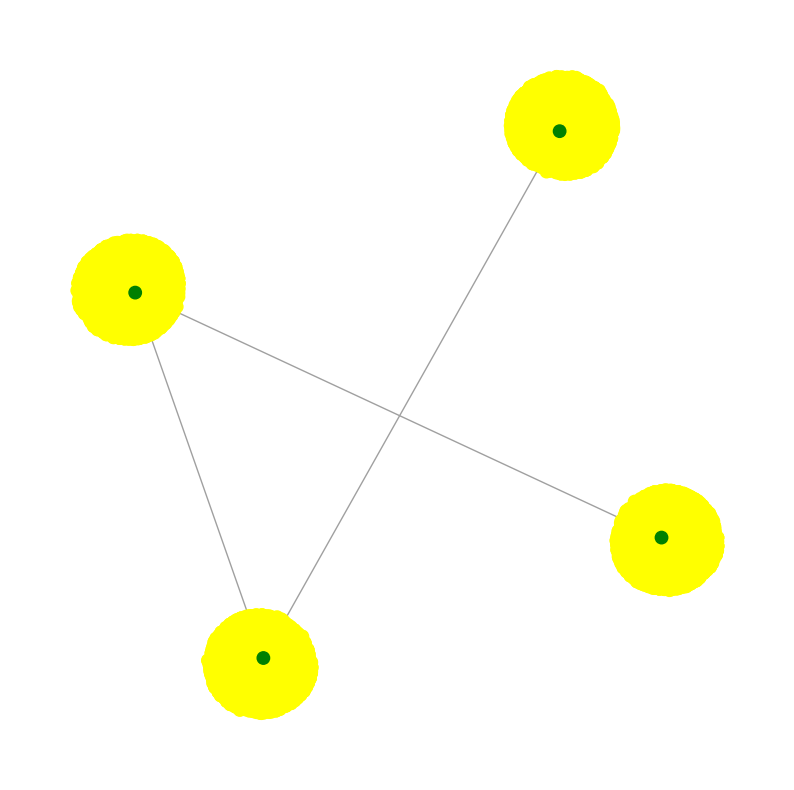

In [7]:
env = ExtremeNet()

G = nx.Graph()
G.add_nodes_from([x for x in range(env.nodes_n)])
edges = concat_edges(env)
G.add_edges_from(edges)


pos = nx.spring_layout(G)
dmin, ncenter = 1, 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

p = {}

for i, node in enumerate(env.map.nodes):
    if node.property == Property.GOOD:
        p[i] = "green"
    elif node.property == Property.RANDOM:
        p[i] = "red"
    elif node.property == Property.CONSTANT:
        p[i] = "blue"
    elif node.property == Property.CREEPY:
        p[i] = "yellow"

# for i, node in enumerate(env.map.nodes):
#     p[i] = len(node.weights)
# max_p = max(p.values())
# for k, v in p.items():
#     p[k] /= max_p


plt.figure(figsize=(10, 10))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], edge_color='#A0A0A0', width=1)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

# plt.xlim(-0.05, 1.05)
# plt.ylim(-0.05, 1.05)
plt.axis("off")
# plt.title('Large Scale Net Topology')

plt.show()
# plt.savefig('nodes.eps', format='eps')